# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from LifeCycleModel import LifeCycleModelModelClass

# Solve and simulate

In [2]:
model = LifeCycleModelModelClass(name='baseline')

In [3]:
par = model.par
sol = model.sol
sim = model.sim

In [4]:
model.solve()

 t = 54 solved in 3.7 secs
 t = 53 solved in 4.0 secs (post-decision: 4.0 secs)
 t = 52 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 51 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 50 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 49 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 48 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 47 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 46 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 45 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 44 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 43 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 42 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 41 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 40 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 39 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 38 solved in 0.3 secs (post-decision: 0.3 secs)
 t = 37 solved in 0.3 secs (post-decision: 0.3 secs)
 t = 36 solved in 0.3 secs (post-decision: 0.3 secs)
 t = 35 solved in 0

In [5]:
model.simulate()

model simulated in 10.5 secs


# Figures

## Income

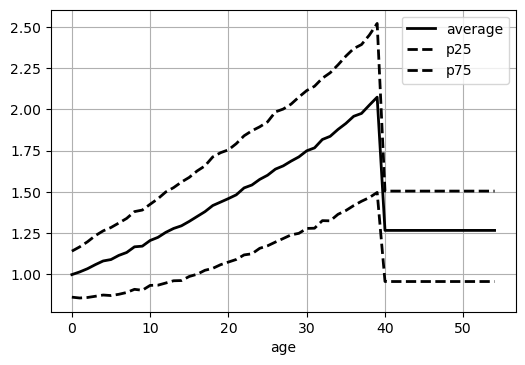

In [6]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.y,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.y,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.y,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

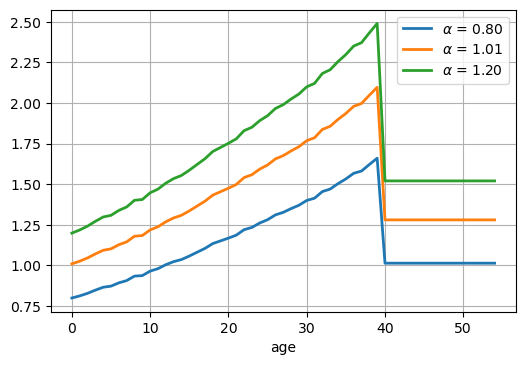

In [7]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:
    
    I = sim.alpha == par.grid_alpha[ialpha]
    ax.plot(age,np.mean(sim.y[:,I],axis=1),lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

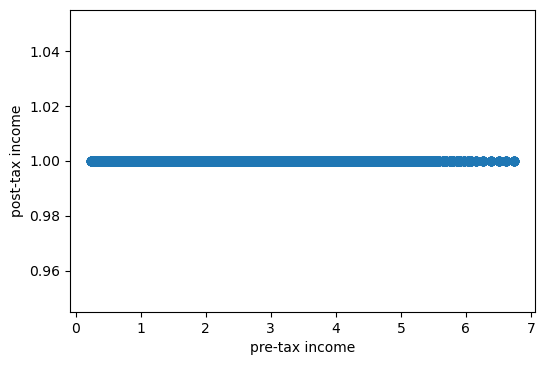

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.scatter(sim.y_pre[30,:],sim.y[30,:]/sim.y_pre[30,:])
ax.set_xlabel('pre-tax income')
ax.set_ylabel('post-tax income');

## Consumption

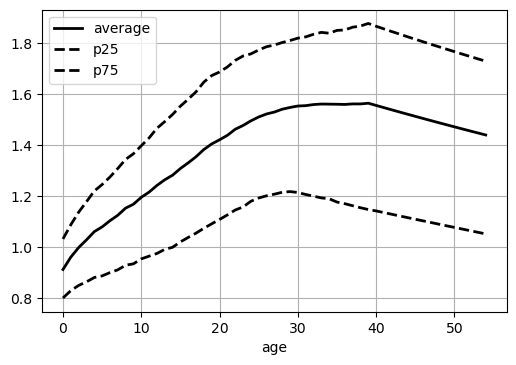

In [9]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.c,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.c,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.c,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

## Relative to $\alpha$

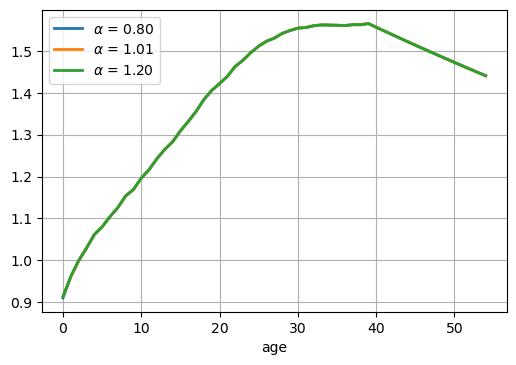

In [10]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)

for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:
    
    alpha = par.grid_alpha[ialpha]
    I = sim.alpha == alpha
    
    ax.plot(age,np.mean(sim.c[:,I],axis=1)/alpha,lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

## Savings

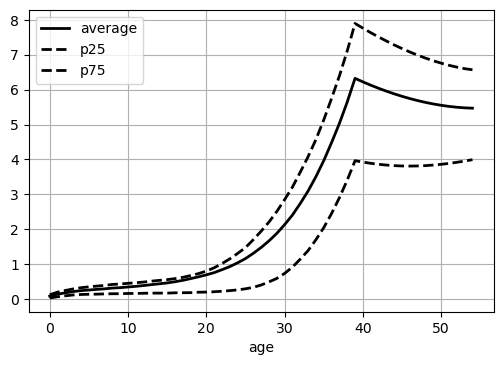

In [11]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.a,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.a,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.a,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

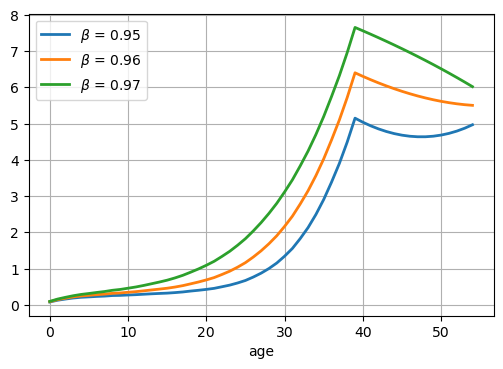

In [12]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
for ibeta in [0,par.Nbeta//2,par.Nbeta-1]:
    
    I = sim.beta == par.grid_beta[ibeta]
    ax.plot(age,np.mean(sim.a[:,I],axis=1),lw=2,label=f'$\\beta$ = {par.grid_beta[ibeta]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

# MPC(P)[t]

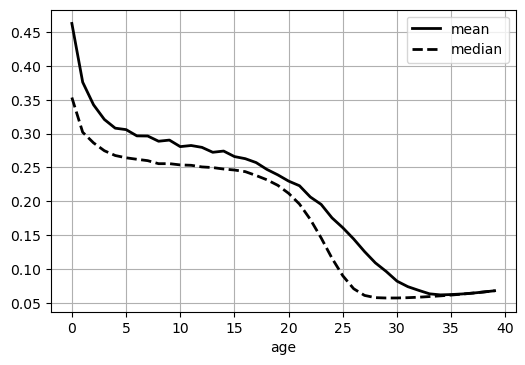

In [13]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPC[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPC[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

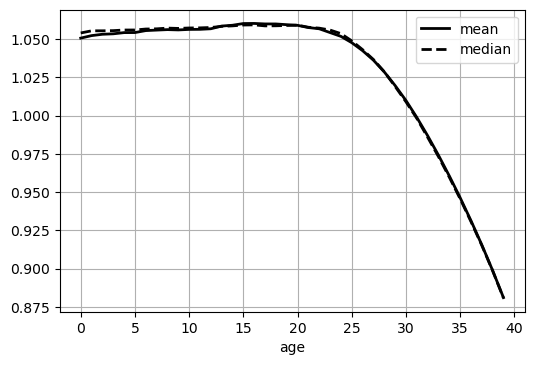

In [14]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_perm[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_perm[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

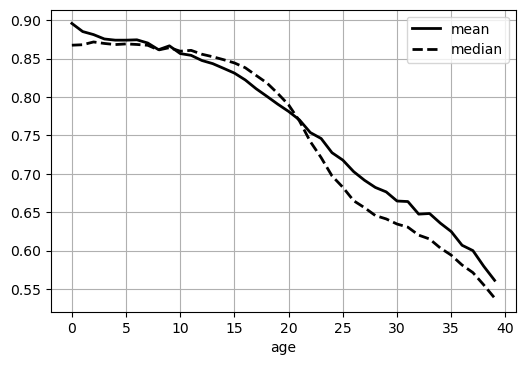

In [15]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_pers[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_pers[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

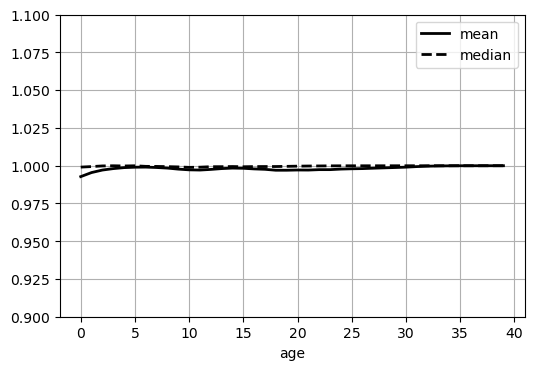

In [16]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_scale[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_scale[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age')
ax.set_ylim([0.9,1.1]);

In [17]:
def print_MPCP(model):
    
    print(f' perm: {np.mean(model.sim.MPCP_perm[:par.Tr,:]):.4f}')
    print(f' pers: {np.mean(model.sim.MPCP_pers[:par.Tr,:]):.4f}')
    print(f'scale: {np.mean(model.sim.MPCP_scale[:par.Tr,:]):.4f}')
            

In [18]:
print_MPCP(model)

 perm: 1.0272
 pers: 0.7633
scale: 0.9982


# Data sets

In [19]:
model.name = 'baseline'

In [20]:
models = []

for non_homo in [False,True]:
    for tau in [False,True]:
        for rho in [False,True]:
            for iota in [False,True]:
        
                model_ = model.copy()
                model_.name = 'baseline'
                
                model_.par.do_print = False

                if non_homo:
                    model_.name += '_non_homo'
                    model_.par.sigma0 = 12.0
                    model_.par.aubar = 15.0
                    model_.par.omega = 0.95

                if tau:
                    model_.name += '_tau'
                    model_.par.tau = 0.15            

                if rho:
                    model_.name += '_rho'
                    model_.par.rho = 1.0

                if iota:
                    model_.name += '_iota'
                    model_.par.iota = 10.0

                print(model_.name)
                if non_homo or tau or rho or iota:
                    
                    model_.allocate()
                    model_.solve()
                    model_.simulate()
                    model_.sol = None
                    
                else:
                    
                    model_ = model
                
                print_MPCP(model_)
                
                models.append(model_)
                print('')


baseline
 perm: 1.0272
 pers: 0.7633
scale: 0.9982

baseline_iota
 perm: 1.0278
 pers: 0.7637
scale: 1.0001

baseline_rho
 perm: 1.0503
 pers: 0.8797
scale: 0.9990

baseline_rho_iota
 perm: 1.0508
 pers: 0.8800
scale: 1.0005

baseline_tau
 perm: 1.0253
 pers: 0.7683
scale: 0.9631

baseline_tau_iota
 perm: 1.0259
 pers: 0.7684
scale: 0.9657

baseline_tau_rho
 perm: 1.0479
 pers: 0.8866
scale: 0.9666

baseline_tau_rho_iota
 perm: 1.0484
 pers: 0.8871
scale: 0.9686

baseline_non_homo
 perm: 0.6636
 pers: 0.4657
scale: 0.6708

baseline_non_homo_iota
 perm: 0.6643
 pers: 0.4693
scale: 0.6744

baseline_non_homo_rho
 perm: 0.6712
 pers: 0.5468
scale: 0.6558

baseline_non_homo_rho_iota
 perm: 0.6735
 pers: 0.5495
scale: 0.6619

baseline_non_homo_tau
 perm: 0.6652
 pers: 0.4699
scale: 0.6507

baseline_non_homo_tau_iota
 perm: 0.6663
 pers: 0.4734
scale: 0.6553

baseline_non_homo_tau_rho
 perm: 0.6729
 pers: 0.5520
scale: 0.6393

baseline_non_homo_tau_rho_iota
 perm: 0.6756
 pers: 0.5549
scale: 

baseline


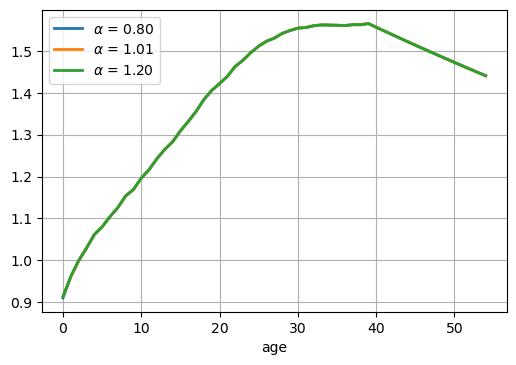

baseline_non_homo


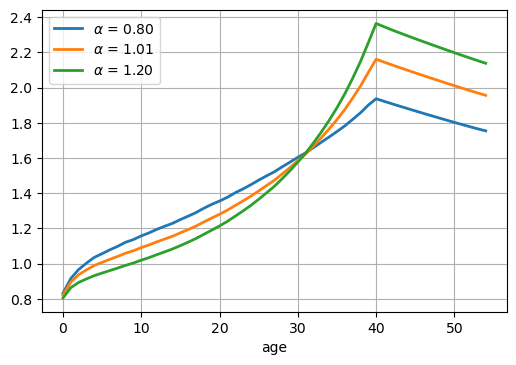

baseline_non_homo_rho


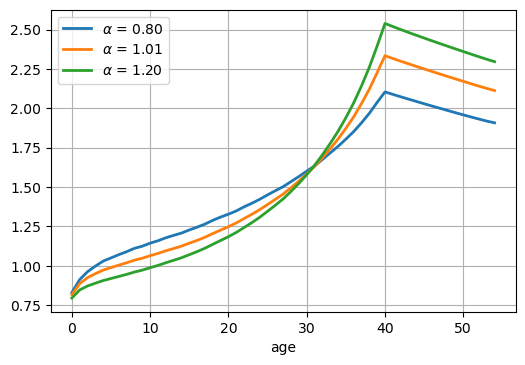

baseline_non_homo_tau


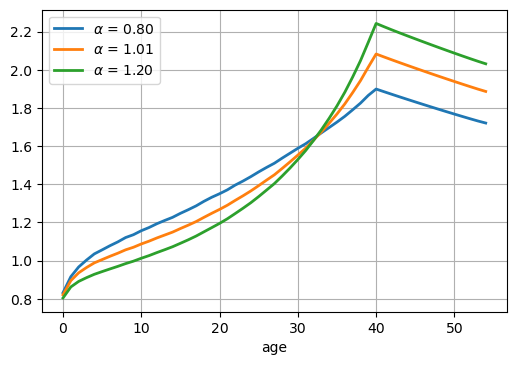

In [21]:
for model_ in models:
    
    if not model_.name in ['baseline','baseline_non_homo','baseline_non_homo_tau','baseline_non_homo_rho']: continue
    print(model_.name)

    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    age = np.arange(par.T)

    for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:

        alpha = par.grid_alpha[ialpha]
        I = model_.sim.alpha == alpha

        ax.plot(age,np.mean(model_.sim.c[:,I],axis=1)/alpha,lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')

    ax.legend(frameon=True)
    ax.grid(True)
    ax.set_xlabel('age');
    
    plt.show()

# Export

In [22]:
import pandas as pd

In [23]:
for model_ in models:
    
    out = {}
    for k,v in model_.sim.__dict__.items():
        if k in ['alpha','beta','psi','xi','p','m']: continue
        out[k] = v[:par.Tr,::100].ravel()
        
    pd.DataFrame(out).to_stata(f'data/{model_.name}.dta')